In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

In [30]:
X,y = sklearn.datasets.make_moons(200, noise=0.10)

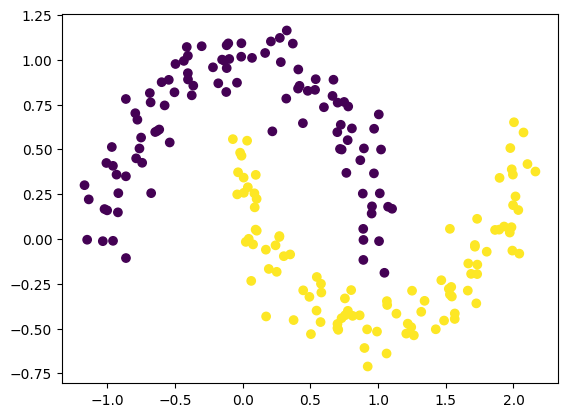

In [32]:
plt.scatter(X[:,0], X[:,1], c=y)

In [34]:
X.shape

(200, 2)

In [164]:
input_neurons = 2
output_neurons = 2
samples = len(X)
learning_rate = 0.001
lamba = 0.01

In [167]:
def retreive(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [197]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return z1, a1, softmax

In [199]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    m = np.zeros(200)
    for i, correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m)
    softmax_loss = np.sum(log_prob)
    reg_loss = lamba / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W1))) 
    loss = softmax_loss + reg_loss
    return float(loss / y.shape[0])
    

In [201]:
def predict(x, model_dic):
    W1, b1, W2, b2 = retreive(model_dic)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(softmax, axis=1)

In [203]:
def backward(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y]-=1
        dw2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T)  * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        #regularization
        dw2 += lamba * np.sum(W2)
        dW1 += lamba * np.sum(W1)
        W1 += (-learning_rate * dW1) 
        b1 += (-learning_rate * db1)
        W2 += (-learning_rate * dw2)
        b2 += (-learning_rate * db2)
        model_dict = {'W1': W1,'b1': b1,'W2': W2,'b2': b2}
        if i % 50 == 0:
            print(f"Loss at epoch {i} is: {loss(probs, y, model_dict)}")

    return model_dict

In [205]:
def init_network(inputs_dim, hidden_dim, output_dim):
    model = {}
    W1 = np.random.randn(inputs_dim, hidden_dim) / np.sqrt(inputs_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
    return model
    

In [207]:
model_dict = init_network(input_neurons, 3, output_neurons)
model = backward(X, y, model_dict, epochs=1500)

Loss at epoch 0 is: 0.6157611008107211
Loss at epoch 50 is: 0.4307064342638705
Loss at epoch 100 is: 0.33556609693647027
Loss at epoch 150 is: 0.3064985303232154
Loss at epoch 200 is: 0.29894054584880786
Loss at epoch 250 is: 0.29607821371162824
Loss at epoch 300 is: 0.2944642889463389
Loss at epoch 350 is: 0.2933182163548165
Loss at epoch 400 is: 0.2924084627188668
Loss at epoch 450 is: 0.2916432172727864
Loss at epoch 500 is: 0.2909756186644417
Loss at epoch 550 is: 0.29037551348113844
Loss at epoch 600 is: 0.2898182716557994
Loss at epoch 650 is: 0.2892785125924855
Loss at epoch 700 is: 0.2887242563170372
Loss at epoch 750 is: 0.2881080609645617
Loss at epoch 800 is: 0.2873497827590972
Loss at epoch 850 is: 0.28629958376854997
Loss at epoch 900 is: 0.2846560755391118
Loss at epoch 950 is: 0.28179329507698037
Loss at epoch 1000 is: 0.27647336411912016
Loss at epoch 1050 is: 0.2667293216518019
Loss at epoch 1100 is: 0.25088599505100523
Loss at epoch 1150 is: 0.229703951685745
Loss at 